# Finetune your Neural Network and save it

🎯 **Goals of this challenge**
    
1. ⚙️ **Finetune the optimizer** of a neural network
2. 💾 **Save**/**Load** a trained neural network

👩🏻‍🏫 Now that you have solid foundations about what Neural Networks are, how to design their architecture and how to prevent them from overfitting, let's take a closer look at the **`.compile(loss = ..., metrics = ..., activation = ...)`** part.

## (0) The Boston Housing Dataset

📚 ***Tensorflow.Keras*** has several built-in datasets that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

🏠 Among them, we are going to use the **`Boston Housing Dataset`**:
- our mission is to ***predict the values of the houses in USD (thousands)***
- and we will measure the performance of our models using the _Mean Absolute Error (MAE)_ metrics.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### (0.1) Loading the dataset

In [2]:
# The Boston Housing Dataset from Keras
from tensorflow.keras.datasets import boston_housing

In [3]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [4]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick glance at the target

<AxesSubplot:ylabel='Count'>

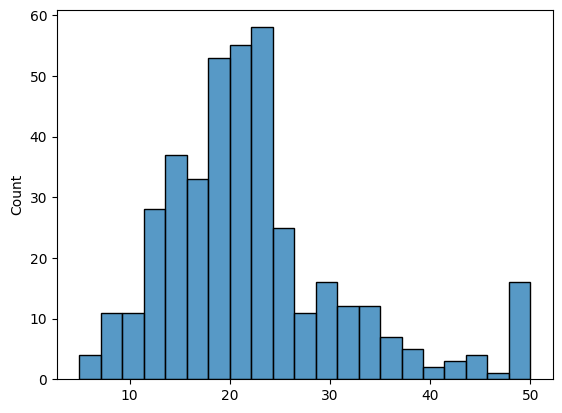

In [5]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

In [6]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [7]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal data preprocessing

👉 Here, we don't have any duplicates or missing values. Let's do the strict minimum of data preprocessing, _i.e._ ***scaling** and move on quickly to the modeling phase.

❓ **Question: scaling your features** ❓ 

Standardize `X_train` and `X_test`.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### (0.4) Baseline Model


🧑🏻‍🏫 In a regression task, **the baseline model always predicts the average value of `y_train`**

<details>
    <summary><i>Really? </i></summary>
    
* 🐒 Yes in most cases...! we also like to call it _"dumbest model"_ but _"baseline model"_ is more correct politically speaking :)
* ❗️ Be aware that this is not the only possible way of building a baseline model.
* 💹 ***In Time Series, the baseline model consists in predicting the last seen value***

❓ **Question: what would be the performance of the baseline model here ?** ❓ 

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if you cannot beat this benchmark score on the test set. (other than showing off)? 

* Compute the Mean Absolute Error on the test set using a _dumb prediction_ of the mean value of `y_train` computed on the train set.

In [9]:
from sklearn.metrics import mean_absolute_error

y_true = y_test.copy()
y_pred = np.full((len(y_test), 1), y_train.mean())

mean_absolute_error_test_baseline = mean_absolute_error(y_true, y_pred)
mean_absolute_error_test_baseline

6.533042127742185

## (1) The Neural Network

❓ **Question: initializing a Neural Network with a specific architecture** ❓

Write a function **`initialize_model`** that generates a Neural Network with 3 layers: 
- Input layer: 10 neurons, _"relu"_ activation function, and an the appropriate input dimension
- Hidden layer: 7 neurons and the _"relu"_ activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Sequential

def initialize_model():
    
    model = Sequential()
    
    model.add(layers.Dense(10, input_dim=13, activation='relu'))
    model.add(layers.Dense(7, activation='relu')) 
    model.add(layers.Dense(1, activation='linear')) 
    
    return model

❓ **Question: number of parameters** ❓

How many parameters do have in this model? 
1. Compute this number yourself
2. Double-check your answer with _model.summary()_

We already covered this question about the **number of parameters in a Fully Connected/Dense network** during **Deep Learning > 01. Fundamentals of Deep Learning** but it is always good to make sure you master the foundations of a new discipline 😉

In [11]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


<details>
    <summary><i>Answer</i></summary>
    
* Each house has `X_train.shape[-1]` = 13 features
* Remember that a neuron is a linear regression combined with an activation function so we will have 13 weights and 1 bias

1. First layer : 10 neurons $\times$ (13 weights + 1 bias ) = 140 params
2. Second layer : 7 neurons $\times$ (10 weights + 1 bias ) = 77 params
3. Third layer : 1 neuron $\times$ (7 weights + 1 bias) = 8 params
    
    
</details>

## (2) The optimizer



❓ **Question about the compiling method** ❓ 

Write a function that:
* takes _both_ a _model_ and an _optimizer_ as arguments,
* ***compiles*** the model,
* and returns the compiled model.

Please select wisely:
* the _loss function_ to be optimized 
* and  the _metrics_ on which the model should be evaluated.

In [12]:
def compile_model(model, optimizer_name):
    
    model.compile(loss='mse', metrics=['mae'], optimizer=optimizer_name)
    
    return model

❓ **Question: evaluating the model** ❓ 

- Initialize the model and compile it with the `adam` optimizer 
- Fit it on the training data. 
- Evaluate your model on the test data.

Don't forget to use an Early Stopping criterion to avoid overfitting 

<details>
    <summary><i>Notes</i></summary>

As we saw in the _"How to prevent overfitting" challenge_,  you could also use L2 penalties and Dropout Layers to prevent overfitting but:
1. _Early Stopping is the easiest and quickest code to implement, you just declare _es = EarlyStopping(...)_ and you call it back in the _.fit()_ _
2. _The main goal of this challenge is to understand the impact of the optimizer_, so stay focused 😉
    
</details>

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model = compile_model(initialize_model(), 'adam')

history = model.fit(X_train, y_train,
              batch_size=16,
              epochs=100,
              callbacks=[es],
              shuffle = True,
              verbose=0)

res = model.evaluate(X_test,y_test)[1]
res

4/4 [==============================] - 0s 610us/step - loss: 20.2595 - mae: 3.2594


3.259413719177246

❓ **Question: a Neural Network vs. a baseline** ❓ 

Compare the MAE on the test best between this Neural Network and the baseline model.

In [18]:
mae_test_baseline = mean_absolute_error_test_baseline
mae_test_neuralnet = res

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 3.2594 for the Neural Network vs. 6.5330 for the baseline


### (2.1) Which optimizer is the best ? 



❓ **Question: trying out different optimizers...** ❓ 

Re-run the same model,  on the same data, but using different optimizers (in a `for` loop). 

For each optimizer:
- 📉 Plot the history of the Loss (MSE) and the Metrics (MAE)
    - 🎁 We coded two functions `plot_loss_mae` and `plot_loss_mse`. Which one should you use? Feel free to use it.
- ✍️ Report the corresponding Mean Absolute Error
- ⏳ Compute the time your Neural Net needed to fit the training set

📚 [**tensorflow/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [19]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    #ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    #ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 606us/step - loss: 24.5894 - mae: 3.1697


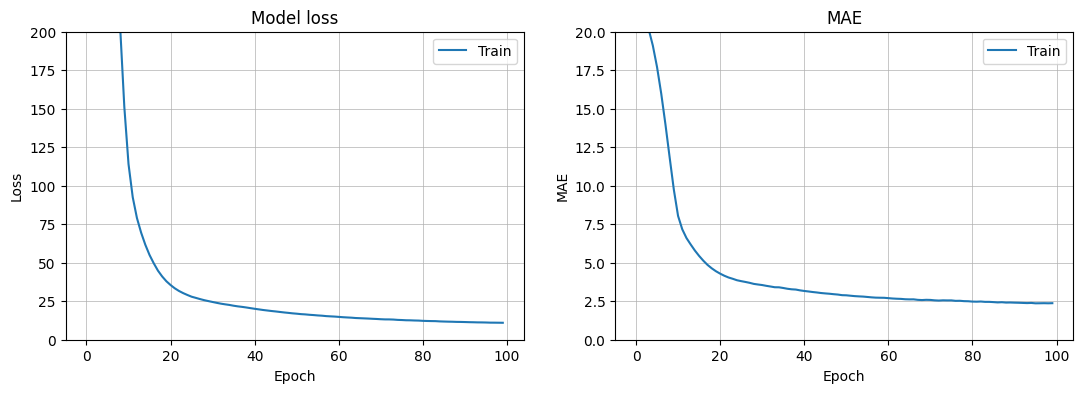

4/4 [==============================] - 0s 578us/step - loss: 30.7336 - mae: 3.9129


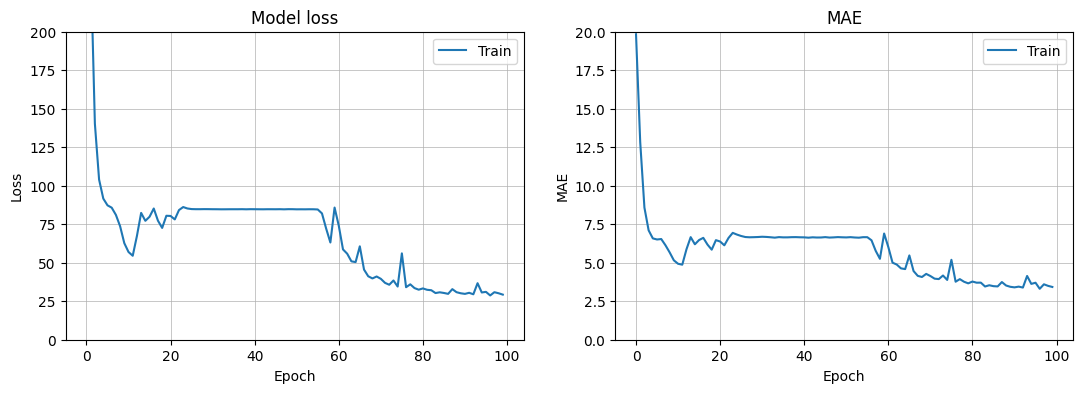

4/4 [==============================] - 0s 576us/step - loss: 516.5798 - mae: 20.7745


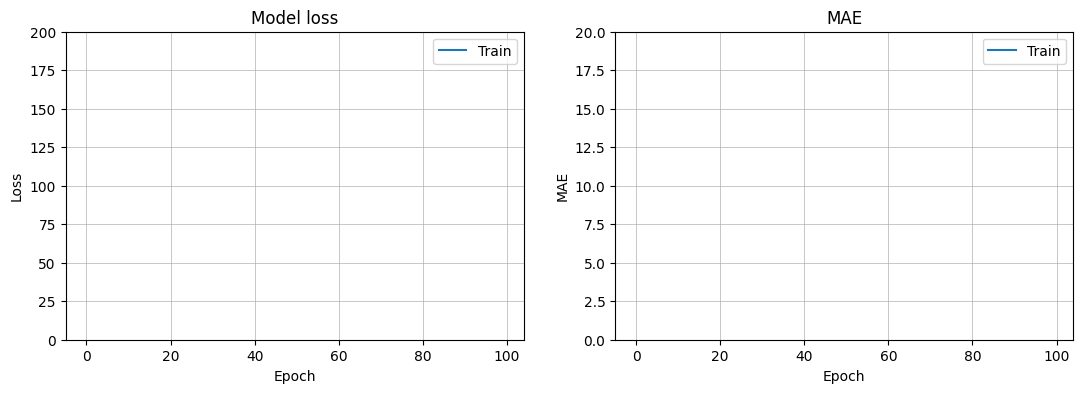

4/4 [==============================] - 0s 597us/step - loss: 23.4557 - mae: 3.1618


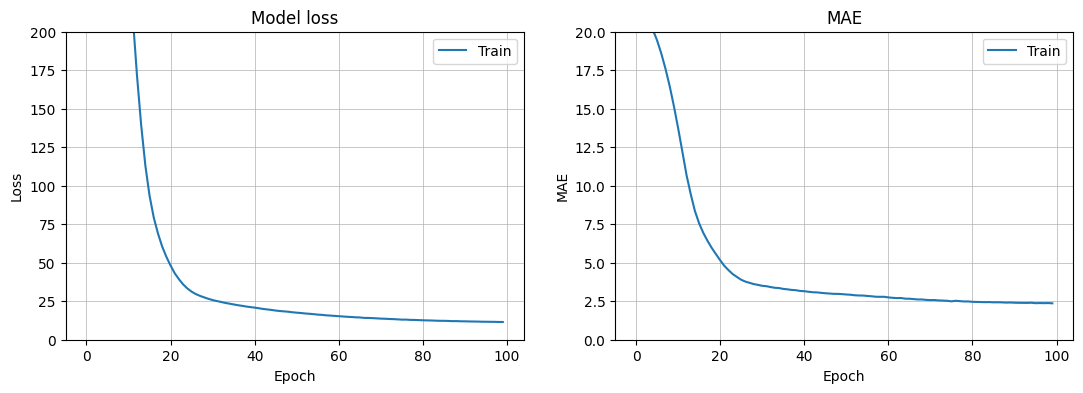

In [20]:
optimizers = ['adam', 'sgd', 'adagrad', 'rmsprop']

scores = []

for optimizer in optimizers:
    
    es = EarlyStopping()
    
    model = compile_model(initialize_model(), optimizer)
    
    history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          callbacks=[es],
          shuffle = True,
          verbose=0)

    scores.append(model.evaluate(X_test,y_test)[1])
    
    plot_loss_mae(history)

In [21]:
print(optimizers)
print(scores)

['adam', 'sgd', 'adagrad', 'rmsprop']
[3.16965913772583, 3.912903070449829, 20.774517059326172, 3.161792516708374]


❓ **Question: a Neural Network vs a baseline - part 2** ❓ 

Are your predictions better than the baseline model you evaluated at the beginning of the notebook?

It's better with adam, dsg or rmsprop  but worse with adagrad

<details>
    <summary><i>Answer</i></summary>
    
You can see that the Neural Network beat the baseline when using either _adam_ or _optimizer_ but it the result was worse than the baseline with the _adagrad_ optimizer.
 
    
</details>

---

👇 The advice from the Deep Learning community is the following 👇:

* 🔥 So far, our best performing optimizer is **`adam`**. Maybe a mathematician specialized in numerical methods will find a better solver in the future but for the moment..., _"adam"_ is your best friend and he/she has already been helping us achieve remarkable results.

---

❗️ So, what's next in this challenge? ❗️

👩‍🎓 Do you remember the ***Machine Learning > 04. Under The Hood*** where we coded our ***Gradient Descent*** choosing a specific ***learning rate***? It represents how slow/fast your algorithm learns. In other words, it controls the intensity of the change of the weights at each optimization of the neural network, at each backpropagation!

🚀 Well, the ***solvers in Machine Learning*** and the ***optimizers in Deep Learning*** are advanced iterative methods relying on ***hyperparameters*** and the learning rate is one of them!

🤔 How can I control this learning rate? 

✅ Instead of calling an optimizer with a string ("adam", "rmsprop", ...) which uses a default value of the learning rate, we will call 📚 [**tf/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects 📚 and tailor them to our needs.

🧑🏻‍🏫 Different learning rates have different consequences, as shown here: 

<img src="learning_rate.png" alt="Learning rate" style="height:300px;"/>



### (2.2) The influence of the Learning Rate


❓ **Question: selecting an optimizer with a custom learning rate** ❓ 

📚 [**tf/keras/optimizers/Adam**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize an optimizer manually.

* Instantiate an Adam optimizer with a learning rate of $ \alpha = 0.1$
    * Keep the other values to their default values. 
* Use this optimizer in the `compile_model` function
* Train/Fit the model
* Plot the history
* Evaluate your model

In [22]:
import tensorflow

from tensorflow.keras.optimizers import Adam

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)

es = EarlyStopping()

model = compile_model(initialize_model(), opt)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          callbacks=[es],
          shuffle = True)

model_score = model.evaluate(X_test,y_test)[1]
model_score

Epoch 1/100
26/26 [==============================] - 0s 493us/step - loss: 135.4971 - mae: 8.4546
Epoch 2/100
26/26 [==============================] - 0s 538us/step - loss: 28.8982 - mae: 3.9222
Epoch 3/100
26/26 [==============================] - 0s 454us/step - loss: 15.6740 - mae: 2.9045
Epoch 4/100
26/26 [==============================] - 0s 452us/step - loss: 13.2349 - mae: 2.7169
Epoch 5/100
26/26 [==============================] - 0s 433us/step - loss: 13.8573 - mae: 2.7421
Epoch 6/100
26/26 [==============================] - 0s 439us/step - loss: 15.4033 - mae: 2.9452
Epoch 7/100
26/26 [==============================] - 0s 413us/step - loss: 12.3157 - mae: 2.5914
Epoch 8/100
26/26 [==============================] - 0s 429us/step - loss: 12.6277 - mae: 2.6367
Epoch 9/100
26/26 [==============================] - 0s 436us/step - loss: 11.8706 - mae: 2.5895
Epoch 10/100
26/26 [==============================] - 0s 443us/step - loss: 13.1442 - mae: 2.6430
Epoch 11/100
26/26 [========

26/26 [==============================] - 0s 434us/step - loss: 11.6308 - mae: 2.5194
Epoch 29/100
26/26 [==============================] - 0s 435us/step - loss: 7.8234 - mae: 2.0525
Epoch 30/100
26/26 [==============================] - 0s 426us/step - loss: 12.0561 - mae: 2.4787
Epoch 31/100
26/26 [==============================] - 0s 393us/step - loss: 9.5058 - mae: 2.2409
Epoch 32/100
26/26 [==============================] - 0s 424us/step - loss: 9.2870 - mae: 2.2632
Epoch 33/100
26/26 [==============================] - 0s 401us/step - loss: 9.9806 - mae: 2.3692
Epoch 34/100
26/26 [==============================] - 0s 397us/step - loss: 9.2561 - mae: 2.2617
Epoch 35/100
26/26 [==============================] - 0s 421us/step - loss: 8.0400 - mae: 2.0600
Epoch 36/100
26/26 [==============================] - 0s 404us/step - loss: 9.0455 - mae: 2.1537
Epoch 37/100
26/26 [==============================] - 0s 414us/step - loss: 9.2176 - mae: 2.1764
Epoch 38/100
26/26 [=====================

26/26 [==============================] - 0s 424us/step - loss: 7.7471 - mae: 2.0236
Epoch 57/100
26/26 [==============================] - 0s 391us/step - loss: 7.0878 - mae: 1.9631
Epoch 58/100
26/26 [==============================] - 0s 407us/step - loss: 8.7136 - mae: 2.0468
Epoch 59/100
26/26 [==============================] - 0s 422us/step - loss: 8.1197 - mae: 2.1568
Epoch 60/100
26/26 [==============================] - 0s 413us/step - loss: 8.6710 - mae: 2.2080
Epoch 61/100
26/26 [==============================] - 0s 400us/step - loss: 12.4456 - mae: 2.7227
Epoch 62/100
26/26 [==============================] - 0s 411us/step - loss: 7.2383 - mae: 1.9904
Epoch 63/100
26/26 [==============================] - 0s 392us/step - loss: 8.2965 - mae: 2.0919
Epoch 64/100
26/26 [==============================] - 0s 397us/step - loss: 8.4182 - mae: 2.1489
Epoch 65/100
26/26 [==============================] - 0s 398us/step - loss: 7.5878 - mae: 1.9798
Epoch 66/100
26/26 [======================

26/26 [==============================] - 0s 424us/step - loss: 8.2627 - mae: 2.1325
Epoch 84/100
26/26 [==============================] - 0s 450us/step - loss: 7.7514 - mae: 2.0360
Epoch 85/100
26/26 [==============================] - 0s 446us/step - loss: 7.8798 - mae: 2.0934
Epoch 86/100
26/26 [==============================] - 0s 395us/step - loss: 11.6019 - mae: 2.5278
Epoch 87/100
26/26 [==============================] - 0s 425us/step - loss: 13.5432 - mae: 2.6348
Epoch 88/100
26/26 [==============================] - 0s 416us/step - loss: 10.4199 - mae: 2.4026
Epoch 89/100
26/26 [==============================] - 0s 403us/step - loss: 7.0554 - mae: 2.0177
Epoch 90/100
26/26 [==============================] - 0s 399us/step - loss: 9.4658 - mae: 2.3283
Epoch 91/100
26/26 [==============================] - 0s 415us/step - loss: 9.1693 - mae: 2.2056
Epoch 92/100
26/26 [==============================] - 0s 410us/step - loss: 6.7120 - mae: 1.9138
Epoch 93/100
26/26 [====================

2.446597099304199

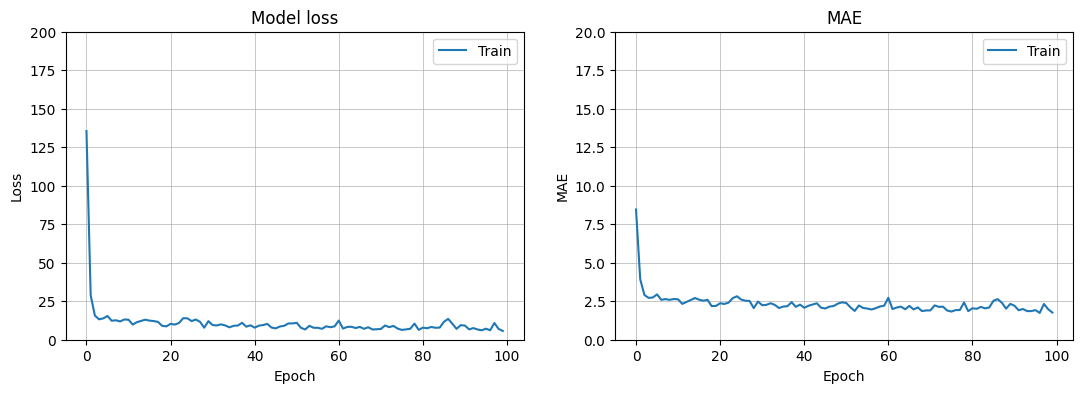

In [23]:
plot_loss_mae(history)

❓ **Question: playing with learning rates** ❓ 

Now, reproduce the same plots and results but for different learning rates.

<details>
    <summary><i>Remark</i></summary>

There is a chance that the y-axis is too large for you to visualize some results with some learning rates. In that case, feel free to re-write the plot function to plot only the epochs $> 10$.
    
</details>

Epoch 1/100
26/26 [==============================] - 0s 516us/step - loss: 590.2004 - mae: 22.5475
Epoch 2/100
26/26 [==============================] - 0s 496us/step - loss: 588.9153 - mae: 22.5205
Epoch 3/100
26/26 [==============================] - 0s 495us/step - loss: 587.6224 - mae: 22.4931
Epoch 4/100
26/26 [==============================] - 0s 462us/step - loss: 586.3435 - mae: 22.4662
Epoch 5/100
26/26 [==============================] - 0s 433us/step - loss: 585.0688 - mae: 22.4391
Epoch 6/100
26/26 [==============================] - 0s 413us/step - loss: 583.7920 - mae: 22.4126
Epoch 7/100
26/26 [==============================] - 0s 451us/step - loss: 582.4968 - mae: 22.3854
Epoch 8/100
26/26 [==============================] - 0s 440us/step - loss: 581.2283 - mae: 22.3590
Epoch 9/100
26/26 [==============================] - 0s 440us/step - loss: 579.9707 - mae: 22.3327
Epoch 10/100
26/26 [==============================] - 0s 413us/step - loss: 578.6802 - mae: 22.3061
Epoch 11/

26/26 [==============================] - 0s 449us/step - loss: 550.9256 - mae: 21.7443
Epoch 29/100
26/26 [==============================] - 0s 399us/step - loss: 548.9189 - mae: 21.7045
Epoch 30/100
26/26 [==============================] - 0s 399us/step - loss: 546.8571 - mae: 21.6638
Epoch 31/100
26/26 [==============================] - 0s 424us/step - loss: 544.6702 - mae: 21.6202
Epoch 32/100
26/26 [==============================] - 0s 414us/step - loss: 542.4516 - mae: 21.5764
Epoch 33/100
26/26 [==============================] - 0s 406us/step - loss: 540.1104 - mae: 21.5302
Epoch 34/100
26/26 [==============================] - 0s 405us/step - loss: 537.7887 - mae: 21.4833
Epoch 35/100
26/26 [==============================] - 0s 420us/step - loss: 535.3427 - mae: 21.4350
Epoch 36/100
26/26 [==============================] - 0s 409us/step - loss: 532.8401 - mae: 21.3851
Epoch 37/100
26/26 [==============================] - 0s 395us/step - loss: 530.2653 - mae: 21.3337
Epoch 38/100


26/26 [==============================] - 0s 418us/step - loss: 470.6906 - mae: 20.0963
Epoch 56/100
26/26 [==============================] - 0s 414us/step - loss: 466.7930 - mae: 20.0118
Epoch 57/100
26/26 [==============================] - 0s 394us/step - loss: 462.6838 - mae: 19.9212
Epoch 58/100
26/26 [==============================] - 0s 419us/step - loss: 458.4539 - mae: 19.8286
Epoch 59/100
26/26 [==============================] - 0s 415us/step - loss: 454.2529 - mae: 19.7355
Epoch 60/100
26/26 [==============================] - 0s 393us/step - loss: 449.9261 - mae: 19.6374
Epoch 61/100
26/26 [==============================] - 0s 425us/step - loss: 445.5662 - mae: 19.5375
Epoch 62/100
26/26 [==============================] - 0s 403us/step - loss: 441.2461 - mae: 19.4385
Epoch 63/100
26/26 [==============================] - 0s 390us/step - loss: 436.7279 - mae: 19.3358
Epoch 64/100
26/26 [==============================] - 0s 408us/step - loss: 432.2663 - mae: 19.2326
Epoch 65/100


26/26 [==============================] - 0s 436us/step - loss: 346.0406 - mae: 17.0109
Epoch 83/100
26/26 [==============================] - 0s 408us/step - loss: 341.2379 - mae: 16.8720
Epoch 84/100
26/26 [==============================] - 0s 398us/step - loss: 336.3934 - mae: 16.7309
Epoch 85/100
26/26 [==============================] - 0s 399us/step - loss: 331.5254 - mae: 16.5880
Epoch 86/100
26/26 [==============================] - 0s 407us/step - loss: 326.6536 - mae: 16.4414
Epoch 87/100
26/26 [==============================] - 0s 408us/step - loss: 321.8331 - mae: 16.2945
Epoch 88/100
26/26 [==============================] - 0s 390us/step - loss: 317.1652 - mae: 16.1489
Epoch 89/100
26/26 [==============================] - 0s 413us/step - loss: 312.4321 - mae: 16.0004
Epoch 90/100
26/26 [==============================] - 0s 426us/step - loss: 307.8499 - mae: 15.8544
Epoch 91/100
26/26 [==============================] - 0s 395us/step - loss: 303.2202 - mae: 15.7043
Epoch 92/100


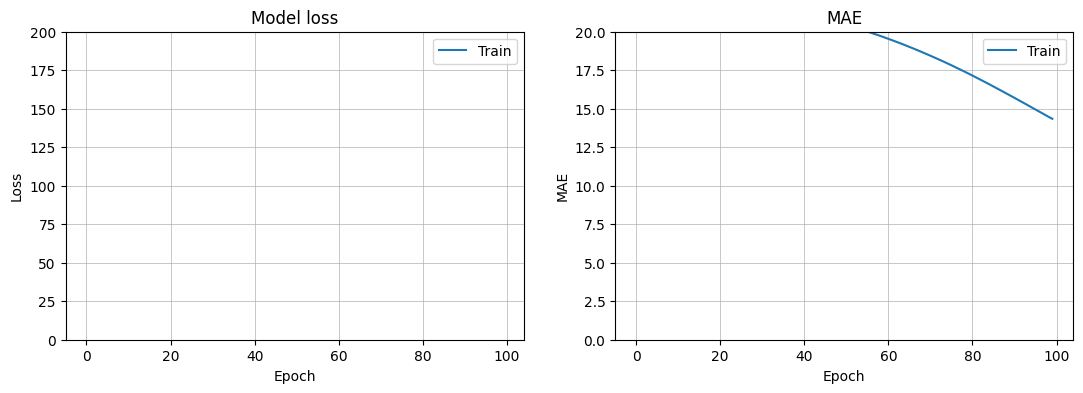

Epoch 1/100
26/26 [==============================] - 0s 495us/step - loss: 572.8491 - mae: 22.1356
Epoch 2/100
26/26 [==============================] - 0s 478us/step - loss: 554.9152 - mae: 21.7424
Epoch 3/100
26/26 [==============================] - 0s 461us/step - loss: 533.6769 - mae: 21.2807
Epoch 4/100
26/26 [==============================] - 0s 436us/step - loss: 507.1411 - mae: 20.6926
Epoch 5/100
26/26 [==============================] - 0s 414us/step - loss: 473.1828 - mae: 19.9153
Epoch 6/100
26/26 [==============================] - 0s 405us/step - loss: 430.6137 - mae: 18.8968
Epoch 7/100
26/26 [==============================] - 0s 434us/step - loss: 379.7822 - mae: 17.5975
Epoch 8/100
26/26 [==============================] - 0s 421us/step - loss: 319.2497 - mae: 15.9622
Epoch 9/100
26/26 [==============================] - 0s 396us/step - loss: 255.6185 - mae: 14.1089
Epoch 10/100
26/26 [==============================] - 0s 397us/step - loss: 196.3584 - mae: 12.1226
Epoch 11/

26/26 [==============================] - 0s 408us/step - loss: 24.3266 - mae: 3.2967
Epoch 29/100
26/26 [==============================] - 0s 424us/step - loss: 23.5990 - mae: 3.2462
Epoch 30/100
26/26 [==============================] - 0s 437us/step - loss: 23.0033 - mae: 3.2110
Epoch 31/100
26/26 [==============================] - 0s 403us/step - loss: 22.3824 - mae: 3.1806
Epoch 32/100
26/26 [==============================] - 0s 426us/step - loss: 21.8010 - mae: 3.1385
Epoch 33/100
26/26 [==============================] - 0s 425us/step - loss: 21.2874 - mae: 3.1159
Epoch 34/100
26/26 [==============================] - 0s 422us/step - loss: 20.8268 - mae: 3.0769
Epoch 35/100
26/26 [==============================] - 0s 406us/step - loss: 20.4182 - mae: 3.0583
Epoch 36/100
26/26 [==============================] - 0s 422us/step - loss: 19.9391 - mae: 3.0271
Epoch 37/100
26/26 [==============================] - 0s 412us/step - loss: 19.6595 - mae: 3.0159
Epoch 38/100
26/26 [=============

26/26 [==============================] - 0s 419us/step - loss: 14.5010 - mae: 2.6128
Epoch 56/100
26/26 [==============================] - 0s 400us/step - loss: 14.2641 - mae: 2.5902
Epoch 57/100
26/26 [==============================] - 0s 436us/step - loss: 14.1282 - mae: 2.5844
Epoch 58/100
26/26 [==============================] - 0s 401us/step - loss: 13.8725 - mae: 2.5525
Epoch 59/100
26/26 [==============================] - 0s 392us/step - loss: 13.7708 - mae: 2.5550
Epoch 60/100
26/26 [==============================] - 0s 403us/step - loss: 13.5395 - mae: 2.5247
Epoch 61/100
26/26 [==============================] - 0s 411us/step - loss: 13.3414 - mae: 2.5136
Epoch 62/100
26/26 [==============================] - 0s 397us/step - loss: 13.2371 - mae: 2.5119
Epoch 63/100
26/26 [==============================] - 0s 405us/step - loss: 13.1121 - mae: 2.4937
Epoch 64/100
26/26 [==============================] - 0s 409us/step - loss: 12.9164 - mae: 2.4716
Epoch 65/100
26/26 [=============

26/26 [==============================] - 0s 404us/step - loss: 11.0515 - mae: 2.3015
Epoch 84/100
26/26 [==============================] - 0s 416us/step - loss: 11.0137 - mae: 2.3093
Epoch 85/100
26/26 [==============================] - 0s 427us/step - loss: 10.8856 - mae: 2.3015
Epoch 86/100
26/26 [==============================] - 0s 416us/step - loss: 10.8080 - mae: 2.2882
Epoch 87/100
26/26 [==============================] - 0s 400us/step - loss: 10.8717 - mae: 2.2824
Epoch 88/100
26/26 [==============================] - 0s 427us/step - loss: 10.7399 - mae: 2.2820
Epoch 89/100
26/26 [==============================] - 0s 421us/step - loss: 10.6525 - mae: 2.2810
Epoch 90/100
26/26 [==============================] - 0s 399us/step - loss: 10.5944 - mae: 2.2706
Epoch 91/100
26/26 [==============================] - 0s 426us/step - loss: 10.5518 - mae: 2.2653
Epoch 92/100
26/26 [==============================] - 0s 412us/step - loss: 10.5245 - mae: 2.2633
Epoch 93/100
26/26 [=============

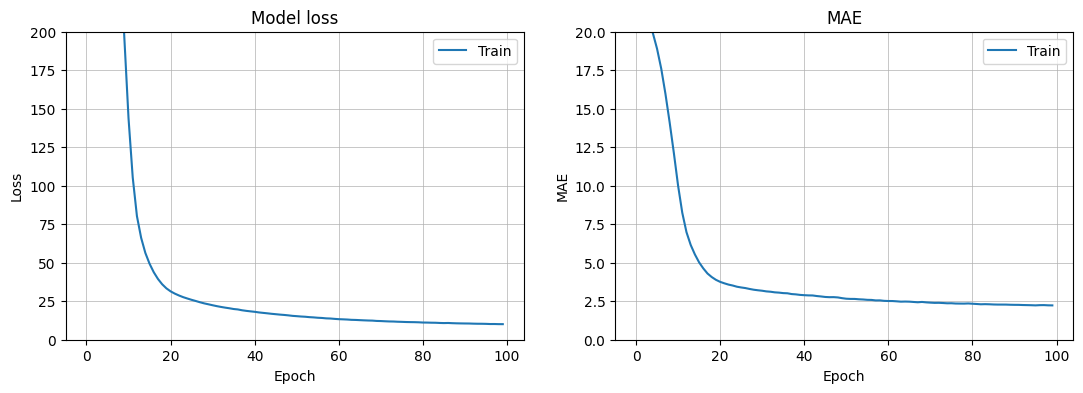

Epoch 1/100
26/26 [==============================] - 0s 489us/step - loss: 453.5065 - mae: 18.7397
Epoch 2/100
26/26 [==============================] - 0s 527us/step - loss: 145.6028 - mae: 9.2758
Epoch 3/100
26/26 [==============================] - 0s 473us/step - loss: 47.2592 - mae: 4.8527
Epoch 4/100
26/26 [==============================] - 0s 454us/step - loss: 28.0371 - mae: 3.8791
Epoch 5/100
26/26 [==============================] - 0s 420us/step - loss: 19.8628 - mae: 3.2680
Epoch 6/100
26/26 [==============================] - 0s 395us/step - loss: 16.0719 - mae: 2.9098
Epoch 7/100
26/26 [==============================] - 0s 444us/step - loss: 14.0373 - mae: 2.7504
Epoch 8/100
26/26 [==============================] - 0s 408us/step - loss: 12.6389 - mae: 2.5859
Epoch 9/100
26/26 [==============================] - 0s 410us/step - loss: 11.4864 - mae: 2.4993
Epoch 10/100
26/26 [==============================] - 0s 402us/step - loss: 10.5028 - mae: 2.3906
Epoch 11/100
26/26 [======

26/26 [==============================] - 0s 408us/step - loss: 8.1720 - mae: 2.0599
Epoch 29/100
26/26 [==============================] - 0s 401us/step - loss: 8.2519 - mae: 2.0504
Epoch 30/100
26/26 [==============================] - 0s 399us/step - loss: 7.9273 - mae: 2.0421
Epoch 31/100
26/26 [==============================] - 0s 418us/step - loss: 7.3963 - mae: 2.0198
Epoch 32/100
26/26 [==============================] - 0s 420us/step - loss: 7.2379 - mae: 1.9403
Epoch 33/100
26/26 [==============================] - 0s 421us/step - loss: 7.3297 - mae: 1.9905
Epoch 34/100
26/26 [==============================] - 0s 408us/step - loss: 7.1888 - mae: 1.9801
Epoch 35/100
26/26 [==============================] - 0s 414us/step - loss: 7.0224 - mae: 1.9158
Epoch 36/100
26/26 [==============================] - 0s 418us/step - loss: 7.0103 - mae: 1.9203
Epoch 37/100
26/26 [==============================] - 0s 395us/step - loss: 7.1482 - mae: 1.9652
Epoch 38/100
26/26 [=======================

26/26 [==============================] - 0s 414us/step - loss: 6.4226 - mae: 1.8648
Epoch 57/100
26/26 [==============================] - 0s 412us/step - loss: 5.9923 - mae: 1.7912
Epoch 58/100
26/26 [==============================] - 0s 414us/step - loss: 6.9129 - mae: 1.9135
Epoch 59/100
26/26 [==============================] - 0s 422us/step - loss: 7.0037 - mae: 1.9527
Epoch 60/100
26/26 [==============================] - 0s 416us/step - loss: 7.4435 - mae: 1.9813
Epoch 61/100
26/26 [==============================] - 0s 389us/step - loss: 6.5720 - mae: 1.8930
Epoch 62/100
26/26 [==============================] - 0s 400us/step - loss: 5.8866 - mae: 1.7756
Epoch 63/100
26/26 [==============================] - 0s 425us/step - loss: 6.4337 - mae: 1.8582
Epoch 64/100
26/26 [==============================] - 0s 403us/step - loss: 6.1849 - mae: 1.8450
Epoch 65/100
26/26 [==============================] - 0s 417us/step - loss: 6.2142 - mae: 1.8345
Epoch 66/100
26/26 [=======================

26/26 [==============================] - 0s 441us/step - loss: 6.0867 - mae: 1.8465
Epoch 84/100
26/26 [==============================] - 0s 430us/step - loss: 5.9222 - mae: 1.8167
Epoch 85/100
26/26 [==============================] - 0s 426us/step - loss: 5.7503 - mae: 1.7618
Epoch 86/100
26/26 [==============================] - 0s 402us/step - loss: 5.3531 - mae: 1.6999
Epoch 87/100
26/26 [==============================] - 0s 418us/step - loss: 5.6397 - mae: 1.7837
Epoch 88/100
26/26 [==============================] - 0s 396us/step - loss: 6.8349 - mae: 1.9684
Epoch 89/100
26/26 [==============================] - 0s 397us/step - loss: 6.2314 - mae: 1.8462
Epoch 90/100
26/26 [==============================] - 0s 420us/step - loss: 5.2958 - mae: 1.7103
Epoch 91/100
26/26 [==============================] - 0s 409us/step - loss: 5.4571 - mae: 1.7075
Epoch 92/100
26/26 [==============================] - 0s 387us/step - loss: 5.2457 - mae: 1.7140
Epoch 93/100
26/26 [=======================

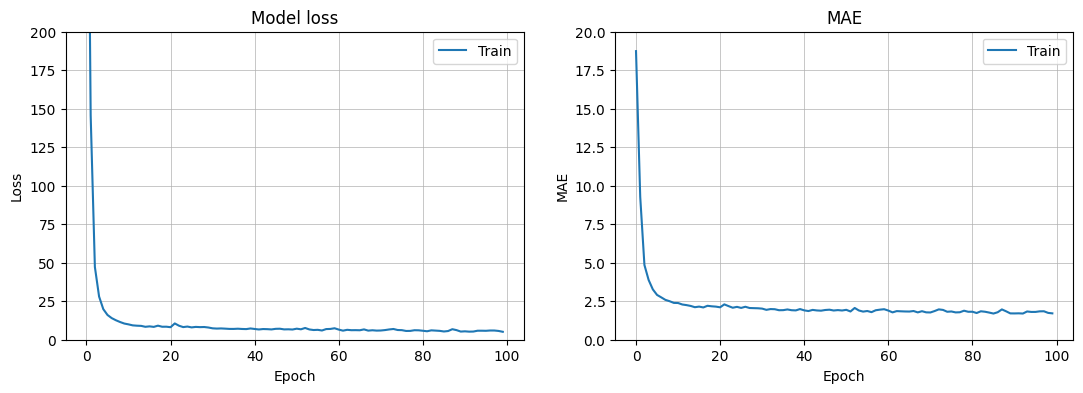

Epoch 1/100
26/26 [==============================] - 0s 480us/step - loss: 160.4338 - mae: 9.0406
Epoch 2/100
26/26 [==============================] - 0s 470us/step - loss: 23.8168 - mae: 3.5006
Epoch 3/100
26/26 [==============================] - 0s 412us/step - loss: 20.8215 - mae: 3.2599
Epoch 4/100
26/26 [==============================] - 0s 411us/step - loss: 15.1709 - mae: 2.9293
Epoch 5/100
26/26 [==============================] - 0s 397us/step - loss: 17.6190 - mae: 3.1704
Epoch 6/100
26/26 [==============================] - 0s 417us/step - loss: 15.1466 - mae: 2.6895
Epoch 7/100
26/26 [==============================] - 0s 383us/step - loss: 12.5066 - mae: 2.5185
Epoch 8/100
26/26 [==============================] - 0s 395us/step - loss: 14.8677 - mae: 2.8459
Epoch 9/100
26/26 [==============================] - 0s 410us/step - loss: 15.6574 - mae: 2.9082
Epoch 10/100
26/26 [==============================] - 0s 399us/step - loss: 11.3444 - mae: 2.5649
Epoch 11/100
26/26 [========

26/26 [==============================] - 0s 414us/step - loss: 7.6114 - mae: 2.0300
Epoch 29/100
26/26 [==============================] - 0s 424us/step - loss: 7.8742 - mae: 2.0919
Epoch 30/100
26/26 [==============================] - 0s 405us/step - loss: 9.8900 - mae: 2.4045
Epoch 31/100
26/26 [==============================] - 0s 424us/step - loss: 13.0179 - mae: 2.5642
Epoch 32/100
26/26 [==============================] - 0s 404us/step - loss: 8.9315 - mae: 2.1831
Epoch 33/100
26/26 [==============================] - 0s 410us/step - loss: 19.3849 - mae: 3.2858
Epoch 34/100
26/26 [==============================] - 0s 398us/step - loss: 14.0088 - mae: 2.6625
Epoch 35/100
26/26 [==============================] - 0s 415us/step - loss: 8.4251 - mae: 2.0864
Epoch 36/100
26/26 [==============================] - 0s 409us/step - loss: 8.5068 - mae: 2.0951
Epoch 37/100
26/26 [==============================] - 0s 402us/step - loss: 8.9319 - mae: 2.2052
Epoch 38/100
26/26 [====================

26/26 [==============================] - 0s 428us/step - loss: 8.3566 - mae: 2.0978
Epoch 57/100
26/26 [==============================] - 0s 408us/step - loss: 10.6870 - mae: 2.3645
Epoch 58/100
26/26 [==============================] - 0s 417us/step - loss: 7.6256 - mae: 1.9914
Epoch 59/100
26/26 [==============================] - 0s 416us/step - loss: 6.4098 - mae: 1.8633
Epoch 60/100
26/26 [==============================] - 0s 404us/step - loss: 6.6584 - mae: 1.8522
Epoch 61/100
26/26 [==============================] - 0s 398us/step - loss: 7.6455 - mae: 2.1296
Epoch 62/100
26/26 [==============================] - 0s 408us/step - loss: 7.9557 - mae: 2.1274
Epoch 63/100
26/26 [==============================] - 0s 423us/step - loss: 10.7239 - mae: 2.4123
Epoch 64/100
26/26 [==============================] - 0s 396us/step - loss: 8.1697 - mae: 2.1190
Epoch 65/100
26/26 [==============================] - 0s 414us/step - loss: 12.4187 - mae: 2.3707
Epoch 66/100
26/26 [====================

26/26 [==============================] - 0s 406us/step - loss: 8.2426 - mae: 2.0614
Epoch 84/100
26/26 [==============================] - 0s 395us/step - loss: 8.9144 - mae: 2.2117
Epoch 85/100
26/26 [==============================] - 0s 408us/step - loss: 8.6288 - mae: 2.1481
Epoch 86/100
26/26 [==============================] - 0s 403us/step - loss: 8.3762 - mae: 2.1114
Epoch 87/100
26/26 [==============================] - 0s 397us/step - loss: 6.6323 - mae: 1.9389
Epoch 88/100
26/26 [==============================] - 0s 421us/step - loss: 9.9438 - mae: 2.1471
Epoch 89/100
26/26 [==============================] - 0s 431us/step - loss: 7.4800 - mae: 2.0847
Epoch 90/100
26/26 [==============================] - 0s 411us/step - loss: 9.5469 - mae: 2.3069
Epoch 91/100
26/26 [==============================] - 0s 405us/step - loss: 9.2364 - mae: 2.3133
Epoch 92/100
26/26 [==============================] - 0s 415us/step - loss: 9.7815 - mae: 2.2544
Epoch 93/100
26/26 [=======================

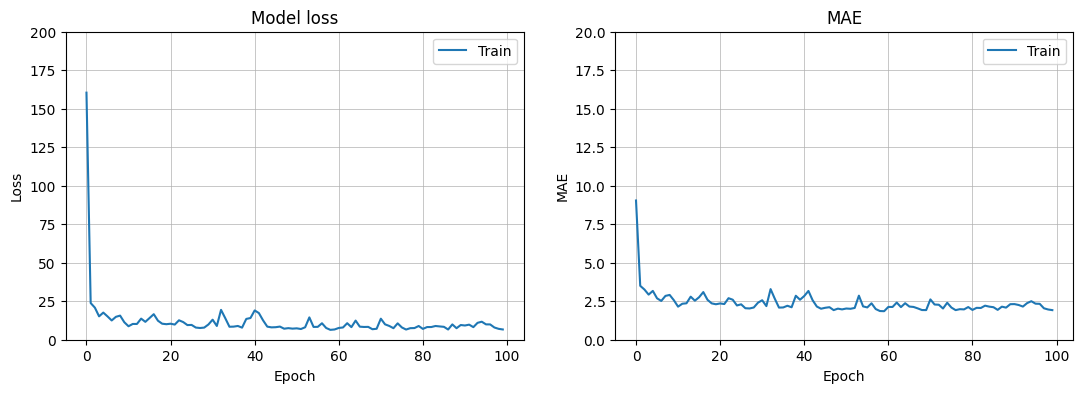

Epoch 1/100
26/26 [==============================] - 0s 489us/step - loss: 3449.6960 - mae: 30.8810
Epoch 2/100
26/26 [==============================] - 0s 488us/step - loss: 309.2765 - mae: 14.8583
Epoch 3/100
26/26 [==============================] - 0s 437us/step - loss: 127.0911 - mae: 8.1292
Epoch 4/100
26/26 [==============================] - 0s 421us/step - loss: 88.5405 - mae: 6.5841
Epoch 5/100
26/26 [==============================] - 0s 393us/step - loss: 84.7640 - mae: 6.6232
Epoch 6/100
26/26 [==============================] - 0s 392us/step - loss: 84.8538 - mae: 6.6543
Epoch 7/100
26/26 [==============================] - 0s 417us/step - loss: 84.6781 - mae: 6.6783
Epoch 8/100
26/26 [==============================] - 0s 403us/step - loss: 84.9859 - mae: 6.7102
Epoch 9/100
26/26 [==============================] - 0s 394us/step - loss: 84.7959 - mae: 6.6030
Epoch 10/100
26/26 [==============================] - 0s 403us/step - loss: 84.7248 - mae: 6.6300
Epoch 11/100
26/26 [===

26/26 [==============================] - 0s 426us/step - loss: 85.4556 - mae: 6.6305
Epoch 29/100
26/26 [==============================] - 0s 424us/step - loss: 84.8092 - mae: 6.6632
Epoch 30/100
26/26 [==============================] - 0s 406us/step - loss: 84.7565 - mae: 6.6448
Epoch 31/100
26/26 [==============================] - 0s 416us/step - loss: 84.7818 - mae: 6.6779
Epoch 32/100
26/26 [==============================] - 0s 411us/step - loss: 85.2833 - mae: 6.7078
Epoch 33/100
26/26 [==============================] - 0s 395us/step - loss: 84.9309 - mae: 6.5736
Epoch 34/100
26/26 [==============================] - 0s 398us/step - loss: 85.0419 - mae: 6.7003
Epoch 35/100
26/26 [==============================] - 0s 403us/step - loss: 85.2444 - mae: 6.6323
Epoch 36/100
26/26 [==============================] - 0s 414us/step - loss: 84.9768 - mae: 6.6172
Epoch 37/100
26/26 [==============================] - 0s 388us/step - loss: 84.9239 - mae: 6.7358
Epoch 38/100
26/26 [=============

26/26 [==============================] - 0s 425us/step - loss: 84.9519 - mae: 6.7061
Epoch 57/100
26/26 [==============================] - 0s 412us/step - loss: 85.1244 - mae: 6.6137
Epoch 58/100
26/26 [==============================] - 0s 400us/step - loss: 85.0170 - mae: 6.6383
Epoch 59/100
26/26 [==============================] - 0s 410us/step - loss: 85.3610 - mae: 6.7169
Epoch 60/100
26/26 [==============================] - 0s 396us/step - loss: 86.1147 - mae: 6.8004
Epoch 61/100
26/26 [==============================] - 0s 386us/step - loss: 86.3798 - mae: 6.5557
Epoch 62/100
26/26 [==============================] - 0s 416us/step - loss: 84.8092 - mae: 6.7034
Epoch 63/100
26/26 [==============================] - 0s 1ms/step - loss: 85.8845 - mae: 6.7255
Epoch 64/100
26/26 [==============================] - 0s 446us/step - loss: 84.8175 - mae: 6.5943
Epoch 65/100
26/26 [==============================] - 0s 400us/step - loss: 85.5970 - mae: 6.7126
Epoch 66/100
26/26 [===============

26/26 [==============================] - 0s 390us/step - loss: 84.9570 - mae: 6.6156
Epoch 84/100
26/26 [==============================] - 0s 419us/step - loss: 84.7632 - mae: 6.6564
Epoch 85/100
26/26 [==============================] - 0s 438us/step - loss: 85.1302 - mae: 6.6158
Epoch 86/100
26/26 [==============================] - 0s 393us/step - loss: 85.1277 - mae: 6.7217
Epoch 87/100
26/26 [==============================] - 0s 407us/step - loss: 85.0642 - mae: 6.5504
Epoch 88/100
26/26 [==============================] - 0s 404us/step - loss: 86.4543 - mae: 6.7763
Epoch 89/100
26/26 [==============================] - 0s 391us/step - loss: 84.9370 - mae: 6.6390
Epoch 90/100
26/26 [==============================] - 0s 578us/step - loss: 85.2089 - mae: 6.7715
Epoch 91/100
26/26 [==============================] - 0s 390us/step - loss: 86.1304 - mae: 6.5299
Epoch 92/100
26/26 [==============================] - 0s 409us/step - loss: 85.0104 - mae: 6.7389
Epoch 93/100
26/26 [=============

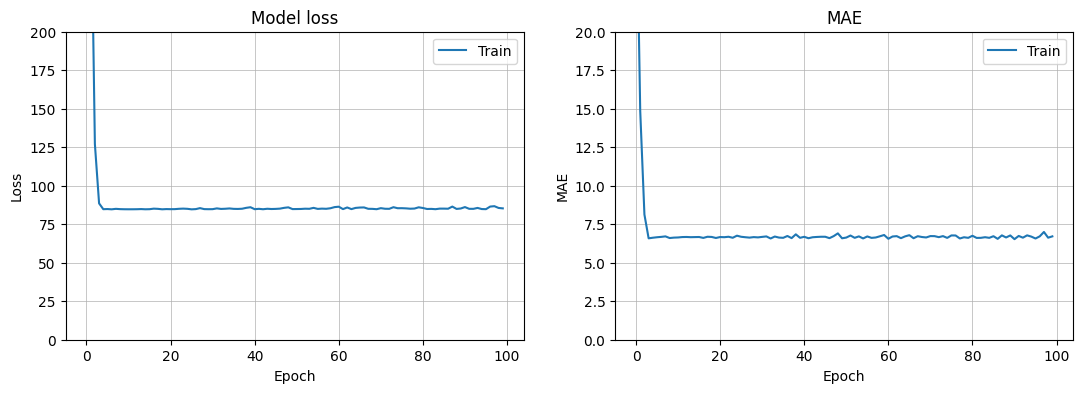

Epoch 1/100
26/26 [==============================] - 0s 492us/step - loss: 2687.5522 - mae: 29.7900
Epoch 2/100
26/26 [==============================] - 0s 497us/step - loss: 132.2653 - mae: 8.2530
Epoch 3/100
26/26 [==============================] - 0s 448us/step - loss: 86.7799 - mae: 7.0953
Epoch 4/100
26/26 [==============================] - 0s 435us/step - loss: 84.4601 - mae: 6.6498
Epoch 5/100
26/26 [==============================] - 0s 442us/step - loss: 85.1158 - mae: 6.5650
Epoch 6/100
26/26 [==============================] - 0s 418us/step - loss: 84.9483 - mae: 6.7102
Epoch 7/100
26/26 [==============================] - 0s 409us/step - loss: 84.8775 - mae: 6.6903
Epoch 8/100
26/26 [==============================] - 0s 417us/step - loss: 85.2148 - mae: 6.6718
Epoch 9/100
26/26 [==============================] - 0s 420us/step - loss: 85.0861 - mae: 6.7199
Epoch 10/100
26/26 [==============================] - 0s 348us/step - loss: 85.1017 - mae: 6.6714
Epoch 11/100
26/26 [=====

26/26 [==============================] - 0s 386us/step - loss: 86.0396 - mae: 6.6763
Epoch 29/100
26/26 [==============================] - 0s 412us/step - loss: 85.1103 - mae: 6.7191
Epoch 30/100
26/26 [==============================] - 0s 413us/step - loss: 85.0519 - mae: 6.7158
Epoch 31/100
26/26 [==============================] - 0s 399us/step - loss: 85.5626 - mae: 6.7080
Epoch 32/100
26/26 [==============================] - 0s 389us/step - loss: 84.9814 - mae: 6.6726
Epoch 33/100
26/26 [==============================] - 0s 400us/step - loss: 85.8558 - mae: 6.6607
Epoch 34/100
26/26 [==============================] - 0s 404us/step - loss: 85.2134 - mae: 6.7269
Epoch 35/100
26/26 [==============================] - 0s 382us/step - loss: 84.8215 - mae: 6.6817
Epoch 36/100
26/26 [==============================] - 0s 404us/step - loss: 85.8040 - mae: 6.6721
Epoch 37/100
26/26 [==============================] - 0s 408us/step - loss: 85.0455 - mae: 6.6263
Epoch 38/100
26/26 [=============

26/26 [==============================] - 0s 410us/step - loss: 86.4274 - mae: 6.6992
Epoch 57/100
26/26 [==============================] - 0s 421us/step - loss: 85.8437 - mae: 6.6102
Epoch 58/100
26/26 [==============================] - 0s 401us/step - loss: 86.5914 - mae: 6.8014
Epoch 59/100
26/26 [==============================] - 0s 391us/step - loss: 85.6493 - mae: 6.6637
Epoch 60/100
26/26 [==============================] - 0s 394us/step - loss: 86.8786 - mae: 6.7677
Epoch 61/100
26/26 [==============================] - 0s 398us/step - loss: 85.1564 - mae: 6.6523
Epoch 62/100
26/26 [==============================] - 0s 398us/step - loss: 86.7407 - mae: 6.8189
Epoch 63/100
26/26 [==============================] - 0s 400us/step - loss: 84.9624 - mae: 6.6767
Epoch 64/100
26/26 [==============================] - 0s 392us/step - loss: 86.1071 - mae: 6.6739
Epoch 65/100
26/26 [==============================] - 0s 396us/step - loss: 86.6891 - mae: 6.7319
Epoch 66/100
26/26 [=============

26/26 [==============================] - 0s 404us/step - loss: 85.9333 - mae: 6.6341
Epoch 84/100
26/26 [==============================] - 0s 416us/step - loss: 85.0387 - mae: 6.7626
Epoch 85/100
26/26 [==============================] - 0s 390us/step - loss: 87.8831 - mae: 6.6987
Epoch 86/100
26/26 [==============================] - 0s 414us/step - loss: 87.5875 - mae: 6.7490
Epoch 87/100
26/26 [==============================] - 0s 407us/step - loss: 85.4039 - mae: 6.7272
Epoch 88/100
26/26 [==============================] - 0s 394us/step - loss: 84.9572 - mae: 6.7180
Epoch 89/100
26/26 [==============================] - 0s 413us/step - loss: 86.1273 - mae: 6.7330
Epoch 90/100
26/26 [==============================] - 0s 401us/step - loss: 88.1634 - mae: 6.8824
Epoch 91/100
26/26 [==============================] - 0s 401us/step - loss: 85.6665 - mae: 6.7445
Epoch 92/100
26/26 [==============================] - 0s 396us/step - loss: 86.2026 - mae: 6.7049
Epoch 93/100
26/26 [=============

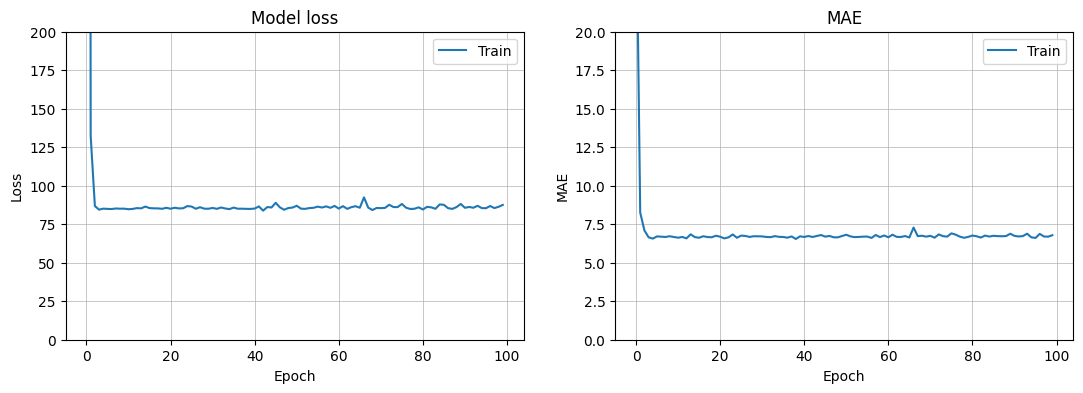

[14.726402282714844, 3.17152738571167, 2.44107723236084, 2.8262460231781006, 6.51636266708374, 6.527864456176758]


In [24]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []

for learning_rate in learning_rates:

    opt = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate)

    es = EarlyStopping()

    model = compile_model(initialize_model(), opt)

    history = model.fit(X_train, y_train,
              batch_size=16,
              epochs=100,
              callbacks=[es],
              shuffle = True)
    
    results.append(model.evaluate(X_test,y_test)[1])
    
    plot_loss_mae(history)
    
    
print(results)

## (3) The loss

---

❗️ It's important to **clearly understand the difference between losses and metrics**. ❗️

* 🏋🏻‍♀️ The **loss functions** are computed ***during the training procedure***
    - For Regression tasks, the classic loss functions are: (Root) Mean Squared Error ((R)MSE), Mean Absolute Error (MAE), Mean Squared Logarithmic Error (MSLE as seen during the Kaggle Challenge)
    - For Classification tasks, the classic loss functions are: Binary Crossentropy (also known as LogLoss), the Categorical Crossentropy, the Hinge Loss, ...
* 🧑🏻‍🏫 The **metrics** are computed ***to evaluate your models, after training them***!
    - For Regression tasks, common metrics are: MSE, MAE, RMSE, Coefficient of Determination R2, ...
    - For Classification tasks, common metrics are: Accuracy, Recall, Precision, F1-Score
* 👀 Notice that some metrics can also be used as loss functions... as long as they are differentiable! (e.g. the *MSE*)

If these notions are not clear, we strongly advise to review ***Machine Learning > 03. Performance Metrics*** and ***Machine Learning > 05. Model Tuning***>

---

⏩ Alright, after this reminder, let's move on:

❓ **Question: optimizing a model with respect to a certain loss function** ❓ 

* Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  
* In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [25]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)

es = EarlyStopping()

model = initialize_model()

model.compile(loss='mae', metrics=['mae'], optimizer=opt)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          callbacks=[es],
          shuffle = True)

Epoch 1/100
26/26 [==============================] - 0s 498us/step - loss: 8.3480 - mae: 8.3480
Epoch 2/100
26/26 [==============================] - 0s 479us/step - loss: 4.1770 - mae: 4.1770
Epoch 3/100
26/26 [==============================] - 0s 465us/step - loss: 3.2477 - mae: 3.2477
Epoch 4/100
26/26 [==============================] - 0s 445us/step - loss: 3.4899 - mae: 3.4899
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 3.3500 - mae: 3.3500
Epoch 6/100
26/26 [==============================] - 0s 436us/step - loss: 2.9203 - mae: 2.9203
Epoch 7/100
26/26 [==============================] - 0s 428us/step - loss: 2.6884 - mae: 2.6884
Epoch 8/100
26/26 [==============================] - 0s 443us/step - loss: 2.7695 - mae: 2.7695
Epoch 9/100
26/26 [==============================] - 0s 416us/step - loss: 2.8294 - mae: 2.8294
Epoch 10/100
26/26 [==============================] - 0s 462us/step - loss: 3.2270 - mae: 3.2270
Epoch 11/100
26/26 [=====================

26/26 [==============================] - 0s 424us/step - loss: 2.2898 - mae: 2.2898
Epoch 29/100
26/26 [==============================] - 0s 421us/step - loss: 2.5932 - mae: 2.5932
Epoch 30/100
26/26 [==============================] - 0s 438us/step - loss: 2.5947 - mae: 2.5947
Epoch 31/100
26/26 [==============================] - 0s 406us/step - loss: 2.2608 - mae: 2.2608
Epoch 32/100
26/26 [==============================] - 0s 411us/step - loss: 2.2690 - mae: 2.2690
Epoch 33/100
26/26 [==============================] - 0s 392us/step - loss: 2.2194 - mae: 2.2194
Epoch 34/100
26/26 [==============================] - 0s 427us/step - loss: 2.2981 - mae: 2.2981
Epoch 35/100
26/26 [==============================] - 0s 418us/step - loss: 2.3464 - mae: 2.3464
Epoch 36/100
26/26 [==============================] - 0s 403us/step - loss: 2.1505 - mae: 2.1505
Epoch 37/100
26/26 [==============================] - 0s 417us/step - loss: 2.2883 - mae: 2.2883
Epoch 38/100
26/26 [=======================

26/26 [==============================] - 0s 391us/step - loss: 1.9043 - mae: 1.9043
Epoch 57/100
26/26 [==============================] - 0s 399us/step - loss: 1.9049 - mae: 1.9049
Epoch 58/100
26/26 [==============================] - 0s 419us/step - loss: 2.1390 - mae: 2.1390
Epoch 59/100
26/26 [==============================] - 0s 402us/step - loss: 2.2070 - mae: 2.2070
Epoch 60/100
26/26 [==============================] - 0s 390us/step - loss: 1.9672 - mae: 1.9672
Epoch 61/100
26/26 [==============================] - 0s 434us/step - loss: 2.0236 - mae: 2.0236
Epoch 62/100
26/26 [==============================] - 0s 399us/step - loss: 2.5822 - mae: 2.5822
Epoch 63/100
26/26 [==============================] - 0s 388us/step - loss: 2.2272 - mae: 2.2272
Epoch 64/100
26/26 [==============================] - 0s 407us/step - loss: 2.0151 - mae: 2.0151
Epoch 65/100
26/26 [==============================] - 0s 416us/step - loss: 2.3450 - mae: 2.3450
Epoch 66/100
26/26 [=======================

26/26 [==============================] - 0s 404us/step - loss: 2.1165 - mae: 2.1165
Epoch 84/100
26/26 [==============================] - 0s 433us/step - loss: 2.0376 - mae: 2.0376
Epoch 85/100
26/26 [==============================] - 0s 410us/step - loss: 2.1128 - mae: 2.1128
Epoch 86/100
26/26 [==============================] - 0s 391us/step - loss: 1.9018 - mae: 1.9018
Epoch 87/100
26/26 [==============================] - 0s 416us/step - loss: 2.0911 - mae: 2.0911
Epoch 88/100
26/26 [==============================] - 0s 395us/step - loss: 1.9601 - mae: 1.9601
Epoch 89/100
26/26 [==============================] - 0s 391us/step - loss: 1.8412 - mae: 1.8412
Epoch 90/100
26/26 [==============================] - 0s 406us/step - loss: 2.2789 - mae: 2.2789
Epoch 91/100
26/26 [==============================] - 0s 400us/step - loss: 2.1330 - mae: 2.1330
Epoch 92/100
26/26 [==============================] - 0s 399us/step - loss: 2.4179 - mae: 2.4179
Epoch 93/100
26/26 [=======================

In [26]:
mae_train = np.mean(history.history['mae'])
mae_val = model.evaluate(X_test,y_test)[1]

print(mae_train)
print(mae_val)

4/4 [==============================] - 0s 619us/step - loss: 2.9196 - mae: 2.9196
2.4036032974720003
2.9195735454559326


In [27]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)

es = EarlyStopping()

model = initialize_model()

model.compile(loss='mse', metrics=['mae'], optimizer=opt)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          callbacks=[es],
          shuffle = True,
                   )

Epoch 1/100
26/26 [==============================] - 0s 509us/step - loss: 98.2275 - mae: 7.2995
Epoch 2/100
26/26 [==============================] - 0s 496us/step - loss: 20.1357 - mae: 3.2855
Epoch 3/100
26/26 [==============================] - 0s 473us/step - loss: 17.5847 - mae: 3.0429
Epoch 4/100
26/26 [==============================] - 0s 459us/step - loss: 12.6736 - mae: 2.6231
Epoch 5/100
26/26 [==============================] - 0s 420us/step - loss: 14.3560 - mae: 2.6893
Epoch 6/100
26/26 [==============================] - 0s 463us/step - loss: 14.1538 - mae: 2.7722
Epoch 7/100
26/26 [==============================] - 0s 442us/step - loss: 14.8542 - mae: 2.8829
Epoch 8/100
26/26 [==============================] - 0s 429us/step - loss: 15.5425 - mae: 3.0615
Epoch 9/100
26/26 [==============================] - 0s 410us/step - loss: 14.2053 - mae: 2.8227
Epoch 10/100
26/26 [==============================] - 0s 456us/step - loss: 24.6234 - mae: 3.8294
Epoch 11/100
26/26 [=========

26/26 [==============================] - 0s 430us/step - loss: 11.5923 - mae: 2.4720
Epoch 29/100
26/26 [==============================] - 0s 405us/step - loss: 10.0272 - mae: 2.3611
Epoch 30/100
26/26 [==============================] - 0s 435us/step - loss: 10.0715 - mae: 2.3322
Epoch 31/100
26/26 [==============================] - 0s 443us/step - loss: 9.1199 - mae: 2.2069
Epoch 32/100
26/26 [==============================] - 0s 408us/step - loss: 13.2254 - mae: 2.6614
Epoch 33/100
26/26 [==============================] - 0s 385us/step - loss: 21.9505 - mae: 3.5583
Epoch 34/100
26/26 [==============================] - 0s 414us/step - loss: 9.1165 - mae: 2.2628
Epoch 35/100
26/26 [==============================] - 0s 411us/step - loss: 10.5135 - mae: 2.3827
Epoch 36/100
26/26 [==============================] - 0s 404us/step - loss: 8.7267 - mae: 2.1315
Epoch 37/100
26/26 [==============================] - 0s 405us/step - loss: 7.9084 - mae: 2.1122
Epoch 38/100
26/26 [=================

26/26 [==============================] - 0s 407us/step - loss: 7.9560 - mae: 2.0259
Epoch 57/100
26/26 [==============================] - 0s 395us/step - loss: 8.4496 - mae: 2.0861
Epoch 58/100
26/26 [==============================] - 0s 436us/step - loss: 7.8498 - mae: 2.1015
Epoch 59/100
26/26 [==============================] - 0s 422us/step - loss: 7.5950 - mae: 1.9878
Epoch 60/100
26/26 [==============================] - 0s 407us/step - loss: 7.7333 - mae: 2.0826
Epoch 61/100
26/26 [==============================] - 0s 395us/step - loss: 6.6920 - mae: 1.8830
Epoch 62/100
26/26 [==============================] - 0s 408us/step - loss: 7.0498 - mae: 1.9396
Epoch 63/100
26/26 [==============================] - 0s 416us/step - loss: 8.9425 - mae: 2.1786
Epoch 64/100
26/26 [==============================] - 0s 395us/step - loss: 8.4061 - mae: 2.2040
Epoch 65/100
26/26 [==============================] - 0s 407us/step - loss: 8.1698 - mae: 2.0941
Epoch 66/100
26/26 [=======================

26/26 [==============================] - 0s 422us/step - loss: 8.8880 - mae: 2.1283
Epoch 84/100
26/26 [==============================] - 0s 422us/step - loss: 8.5162 - mae: 2.1088
Epoch 85/100
26/26 [==============================] - 0s 423us/step - loss: 7.9132 - mae: 1.9692
Epoch 86/100
26/26 [==============================] - 0s 415us/step - loss: 7.4842 - mae: 2.0537
Epoch 87/100
26/26 [==============================] - 0s 418us/step - loss: 6.1628 - mae: 1.7913
Epoch 88/100
26/26 [==============================] - 0s 399us/step - loss: 6.1331 - mae: 1.7786
Epoch 89/100
26/26 [==============================] - 0s 420us/step - loss: 8.6977 - mae: 2.1431
Epoch 90/100
26/26 [==============================] - 0s 389us/step - loss: 13.2081 - mae: 2.6586
Epoch 91/100
26/26 [==============================] - 0s 413us/step - loss: 9.2263 - mae: 2.1361
Epoch 92/100
26/26 [==============================] - 0s 424us/step - loss: 8.0979 - mae: 2.1362
Epoch 93/100
26/26 [======================

In [28]:
mse_train = np.mean(history.history['mae'])
mse_val = model.evaluate(X_test,y_test)[1]

print(mse_train)
print(mse_val)

4/4 [==============================] - 0s 601us/step - loss: 19.4984 - mae: 2.5329
2.343406229019165
2.532949447631836


🤔 When you work on this regression task, you want to achieve the lowest MAE in the test set at the end, right? So why wouldn't we use it directly as a loss function that would decrease with respect to the number of epochs? 

<details>
    <summary>Answer</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameters are best suited to the MSE than to the MAE loss?

</details>

## (4)  Saving and loading a trained neural network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new datapoint. Would you give this person your notebook for her/him to run it entirely and then predict the new datapoint? Hell no, we have a much better solution:
- 💾 Save the weights of the optimized neural network
- 🤝 Your friend/colleague/teammate/classmate can use them to predict a new datapoint

❓ **Question: training a good model** ❓

* Try to reach a MAE on the test set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - _Remember: we are predicting house prices, so a mistake of less than 5_000 USD is already good in the real estate industry)_
    
* Whether you managed to reach it or not, move on to the question _"saving a model"_ after a few attempts.

In [29]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)

es = EarlyStopping()

model = initialize_model()

model.compile(loss='mse', metrics=['mae'], optimizer=opt)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          callbacks=[es],
          shuffle = True,
                   )

Epoch 1/100
26/26 [==============================] - 0s 499us/step - loss: 216.1555 - mae: 11.0904
Epoch 2/100
26/26 [==============================] - 0s 519us/step - loss: 22.6518 - mae: 3.4568
Epoch 3/100
26/26 [==============================] - 0s 448us/step - loss: 14.0590 - mae: 2.7766
Epoch 4/100
26/26 [==============================] - 0s 437us/step - loss: 13.3209 - mae: 2.6946
Epoch 5/100
26/26 [==============================] - 0s 416us/step - loss: 13.0316 - mae: 2.6435
Epoch 6/100
26/26 [==============================] - 0s 467us/step - loss: 11.3592 - mae: 2.4666
Epoch 7/100
26/26 [==============================] - 0s 438us/step - loss: 11.7510 - mae: 2.5391
Epoch 8/100
26/26 [==============================] - 0s 423us/step - loss: 11.0949 - mae: 2.4493
Epoch 9/100
26/26 [==============================] - 0s 411us/step - loss: 13.7025 - mae: 2.6844
Epoch 10/100
26/26 [==============================] - 0s 449us/step - loss: 18.2225 - mae: 3.1485
Epoch 11/100
26/26 [=======

26/26 [==============================] - 0s 404us/step - loss: 7.8417 - mae: 2.1156
Epoch 29/100
26/26 [==============================] - 0s 436us/step - loss: 8.4648 - mae: 2.2183
Epoch 30/100
26/26 [==============================] - 0s 447us/step - loss: 8.4443 - mae: 2.2176
Epoch 31/100
26/26 [==============================] - 0s 415us/step - loss: 7.8546 - mae: 2.0620
Epoch 32/100
26/26 [==============================] - 0s 392us/step - loss: 8.2124 - mae: 2.1662
Epoch 33/100
26/26 [==============================] - 0s 430us/step - loss: 11.5667 - mae: 2.5677
Epoch 34/100
26/26 [==============================] - 0s 410us/step - loss: 12.0132 - mae: 2.4411
Epoch 35/100
26/26 [==============================] - 0s 406us/step - loss: 17.4447 - mae: 3.0145
Epoch 36/100
26/26 [==============================] - 0s 407us/step - loss: 9.9836 - mae: 2.2941
Epoch 37/100
26/26 [==============================] - 0s 416us/step - loss: 11.1532 - mae: 2.4617
Epoch 38/100
26/26 [===================

26/26 [==============================] - 0s 419us/step - loss: 6.5036 - mae: 1.9122
Epoch 57/100
26/26 [==============================] - 0s 420us/step - loss: 9.5215 - mae: 2.2151
Epoch 58/100
26/26 [==============================] - 0s 452us/step - loss: 6.3663 - mae: 1.8269
Epoch 59/100
26/26 [==============================] - 0s 423us/step - loss: 10.9104 - mae: 2.3560
Epoch 60/100
26/26 [==============================] - 0s 400us/step - loss: 10.9601 - mae: 2.5859
Epoch 61/100
26/26 [==============================] - 0s 398us/step - loss: 10.3547 - mae: 2.4044
Epoch 62/100
26/26 [==============================] - 0s 409us/step - loss: 8.2405 - mae: 2.0380
Epoch 63/100
26/26 [==============================] - 0s 414us/step - loss: 7.4310 - mae: 2.0390
Epoch 64/100
26/26 [==============================] - 0s 397us/step - loss: 7.4124 - mae: 2.0100
Epoch 65/100
26/26 [==============================] - 0s 428us/step - loss: 8.3570 - mae: 2.0272
Epoch 66/100
26/26 [====================

26/26 [==============================] - 0s 440us/step - loss: 6.3146 - mae: 1.8953
Epoch 84/100
26/26 [==============================] - 0s 413us/step - loss: 6.4385 - mae: 1.8847
Epoch 85/100
26/26 [==============================] - 0s 412us/step - loss: 6.1931 - mae: 1.8449
Epoch 86/100
26/26 [==============================] - 0s 402us/step - loss: 6.7017 - mae: 1.9820
Epoch 87/100
26/26 [==============================] - 0s 406us/step - loss: 5.8191 - mae: 1.8372
Epoch 88/100
26/26 [==============================] - 0s 404us/step - loss: 5.6516 - mae: 1.8078
Epoch 89/100
26/26 [==============================] - 0s 407us/step - loss: 7.2132 - mae: 1.9776
Epoch 90/100
26/26 [==============================] - 0s 419us/step - loss: 7.6823 - mae: 2.0779
Epoch 91/100
26/26 [==============================] - 0s 424us/step - loss: 6.9580 - mae: 1.9501
Epoch 92/100
26/26 [==============================] - 0s 396us/step - loss: 8.8842 - mae: 2.1756
Epoch 93/100
26/26 [=======================

In [31]:
mae_test = model.evaluate(X_test,y_test)[1]

4/4 [==============================] - 0s 804us/step - loss: 24.1110 - mae: 2.8889


In [32]:
from nbresult import ChallengeResult
result = ChallengeResult('solution',
    mae_test = mae_test)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-finetune-your-neural-network/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_solution.py::TestSolution::test_is_score_ok PASSED                  [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master



📚 [**tf/keras/models/save_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

❓ **Question: saving a model** ❓  

Save your model using the `.save_model(model, 'name_of_my_model')` method

In [33]:
from tensorflow.keras import models

# Save a model
models.save_model(model, 'my_model')

INFO:tensorflow:Assets written to: my_model/assets


📚 [**tf/keras/models/load_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)

❓ **Question: Loading a model** ❓ 

* Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called `loaded_model

* Evaluate it on the test data to check that it gives the same result as before.

In [34]:
loaded_model = models.load_model('my_model')

In [35]:
mae_loaded_model = loaded_model.evaluate(X_test,y_test)[1]
mae_loaded_model

4/4 [==============================] - 0s 709us/step - loss: 24.1110 - mae: 2.8889


2.888902187347412

## (5) (Optional) Exponential Decay

❗️ Warning ❗️ 

* This section is optional and for advanced practitioners
* The next question is not essential and can be indeed skipped as many algorithms can be run without such optimization. 

🧑🏻‍🏫 Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need a large learning rate to learn fast, and as the neural network converges and gets closer to the minimum of the loss function, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question: the Exponential Decay Scheduler** ❓ 

* Use the 📚 [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 📚 in the `adam` optimizer
* Run it on the previous data. 

Start with the following:

```python
initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,
)
```

In [ ]:
X_train.shape[0]*0.7/16

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

pass  # YOUR CODE HERE

🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!